In [1]:
# relevant libraries
import matplotlib.pyplot as plt
plt.style.use(['science', 'ieee', 'grid'])
import numpy as np # for comparison with np.uniform.random
import math

In [33]:
# seed was not specified, hence chosen the following

seed = 65539 # x_0 = seed

def mlc_generator(modulus, a):
    """
    Multiplicative linear congruential generator.

    Parameters:
        modulus (int): The modulus value (m).
        a (int): The multiplier value (a).

    Returns:
        A pseudo-random number generator function.
    """
    def _generator():
        nonlocal a
        while True:
            a = (a * seed) % modulus
            yield a / modulus
    return _generator()

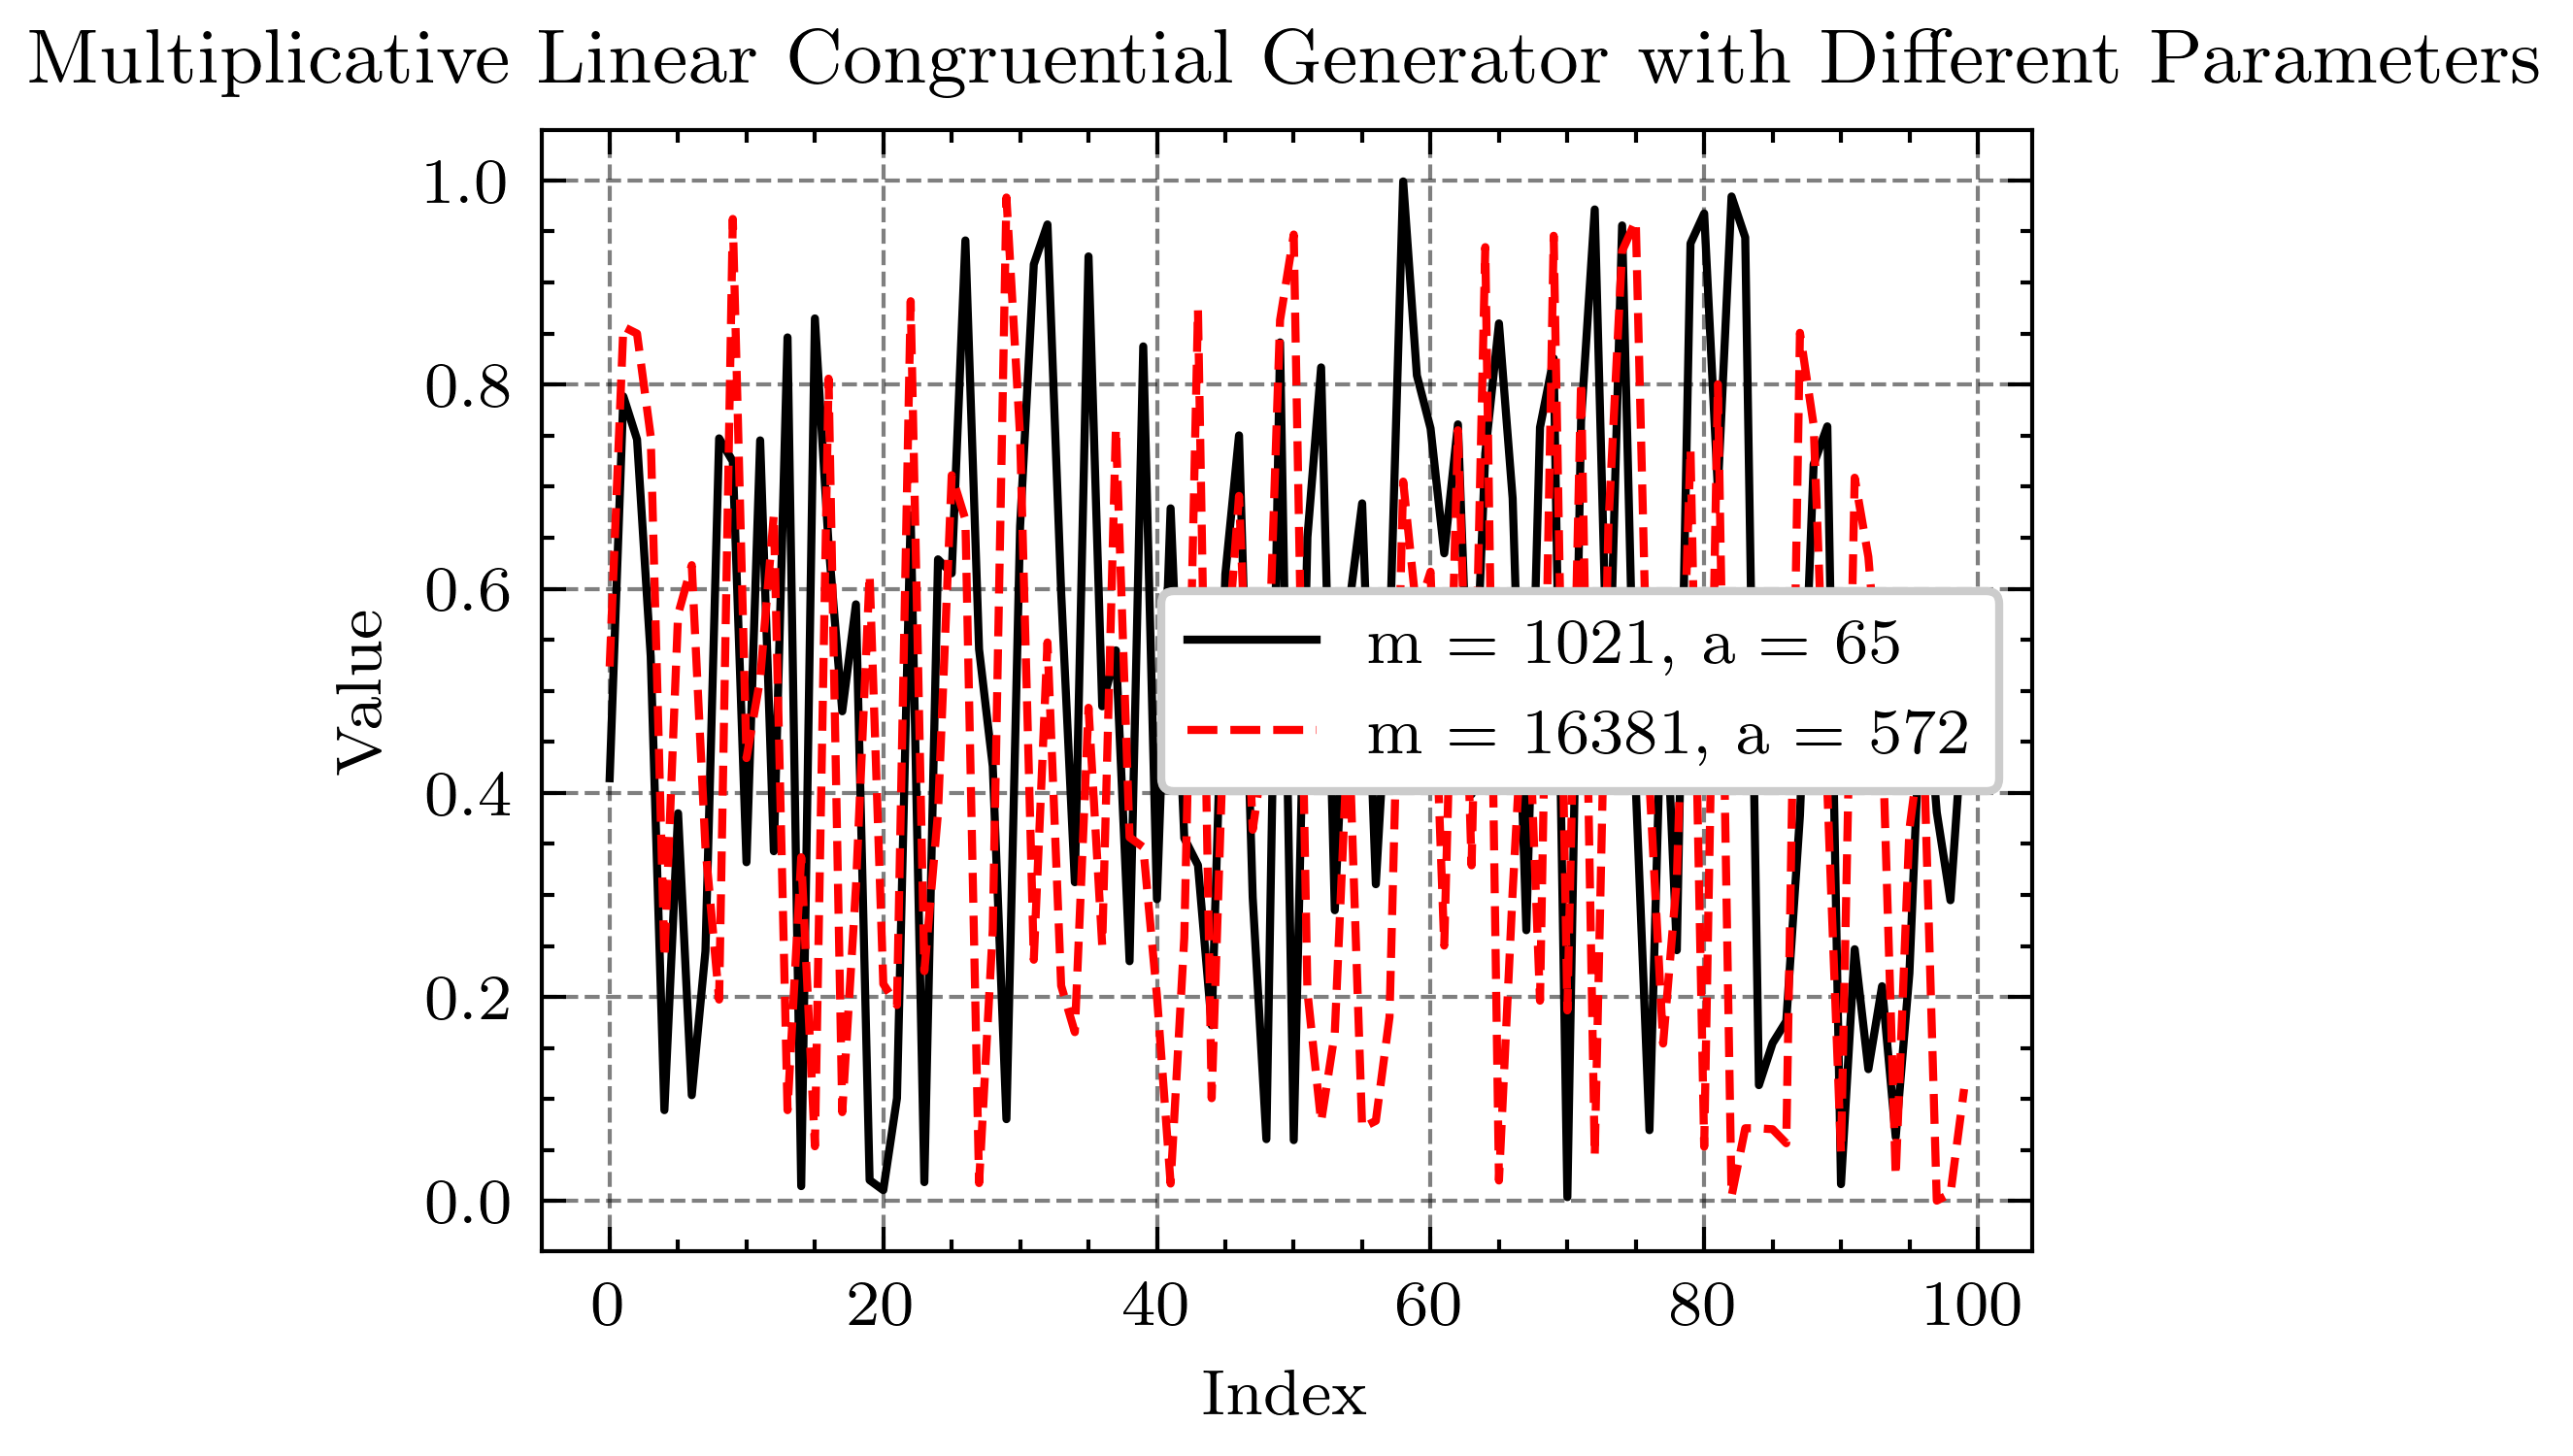

In [3]:
# Part (i): m = 1021, a = 65
gen_i = mlc_generator(1021, 65)
values_i = [next(gen_i) for i in range(100)]

# Part (ii): m = 16381, a = 572
gen_ii = mlc_generator(16381, 572)
values_ii = [next(gen_ii) for i in range(100)]

plt.figure(figsize=(12, 8))
plt.plot(values_i, label="m = 1021, a = 65")
plt.plot(values_ii, label="m = 16381, a = 572")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.title("Multiplicative Linear Congruential Generator with Different Parameters")
plt.show()

In [4]:
def correlation_test(generator, n_samples=1000):
    """
    Perform a correlation test on the random number generator.

    Parameters:
        generator: The random number generator function.
        n_samples (int): Number of samples to generate for the test.

    Returns:
        Correlation coefficient between consecutive samples.
    """
    samples = [next(generator) for _ in range(n_samples)]
    correlation = np.corrcoef(samples[:-1], samples[1:])[0, 1]
    return correlation

def moment_test(generator, moment=2, n_samples=1000):
    """
    Perform a moment test on the random number generator.

    Parameters:
        generator: The random number generator function.
        moment (int): The moment to compute.
        n_samples (int): Number of samples to generate for the test.

    Returns:
        The computed moment.
    """
    samples = np.array([next(generator) for _ in range(n_samples)])
    moment_value = np.mean(samples ** moment)
    return moment_value

In [5]:
print("Correlation Test (i):", correlation_test(gen_i))
print("Moment Test (i):", moment_test(gen_i))
print("Correlation Test (ii):", correlation_test(gen_ii))
print("Moment Test (ii):", moment_test(gen_ii))

Correlation Test (i): -0.015036795357090495
Moment Test (i): 0.3309640670311318
Correlation Test (ii): 0.04715771017123978
Moment Test (ii): 0.3390284905712333


**Correlation Test**: Both generators produce pseudo-random numbers with very weak correlations between consecutive values. This is a desirable property for random number generators, indicating that each generated value is nearly independent of the previous one.

**Moment Test**: The variance of both generators is relatively close. Variance measures how much the values in a dataset vary from the mean value. In this case, the values from both generators have a similar degree of spread around their mean.

## Random number generators from a distribution

In [6]:
def exponential_generator(a, size=1):
    """
    Generate random numbers from an exponential distribution.

    Parameters:
        a (float): The scale parameter of the exponential distribution.
        size (int or tuple of ints): Output shape.

    Returns:
        Random samples from the exponential distribution.
    """
    return -1 / a * np.log(1 - np.random.rand(size))

In [7]:
def lorentz_generator(mu, b, size=1):
    """
    Generate random numbers from a Lorentz distribution.

    Parameters:
        mu (float): The location parameter (mean) of the Lorentz distribution.
        b (float): The scale parameter (half width at half maximum) of the Lorentz distribution.
        size (int or tuple of ints): Output shape.

    Returns:
        Random samples from the Lorentz distribution.
    """
    return mu + b * np.tan(np.pi * (np.random.rand(size) - 0.5))

In [8]:
def gaussian_generator(mu, sigma, size=1):
    """
    Generate random numbers from a Gaussian distribution.

    Parameters:
        mu (float): The mean of the Gaussian distribution.
        sigma (float): The standard deviation (square root of variance) of the Gaussian distribution.
        size (int or tuple of ints): Output shape.

    Returns:
        Random samples from the Gaussian distribution.
    """
    return np.random.normal(mu, sigma, size)

In [9]:
def box_muller(size=1):
    """
    Generate pairs of independent, standard Gaussian distributed random numbers
    using the Box-Muller transformation.

    Parameters:
        size (int or tuple of ints): Output shape.

    Returns:
        Random samples from the standard Gaussian distribution.
    """
    u1 = np.random.rand(size)
    u2 = np.random.rand(size)
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    z1 = r * np.sin(theta)
    z2 = r * np.cos(theta)
    return z1, z2

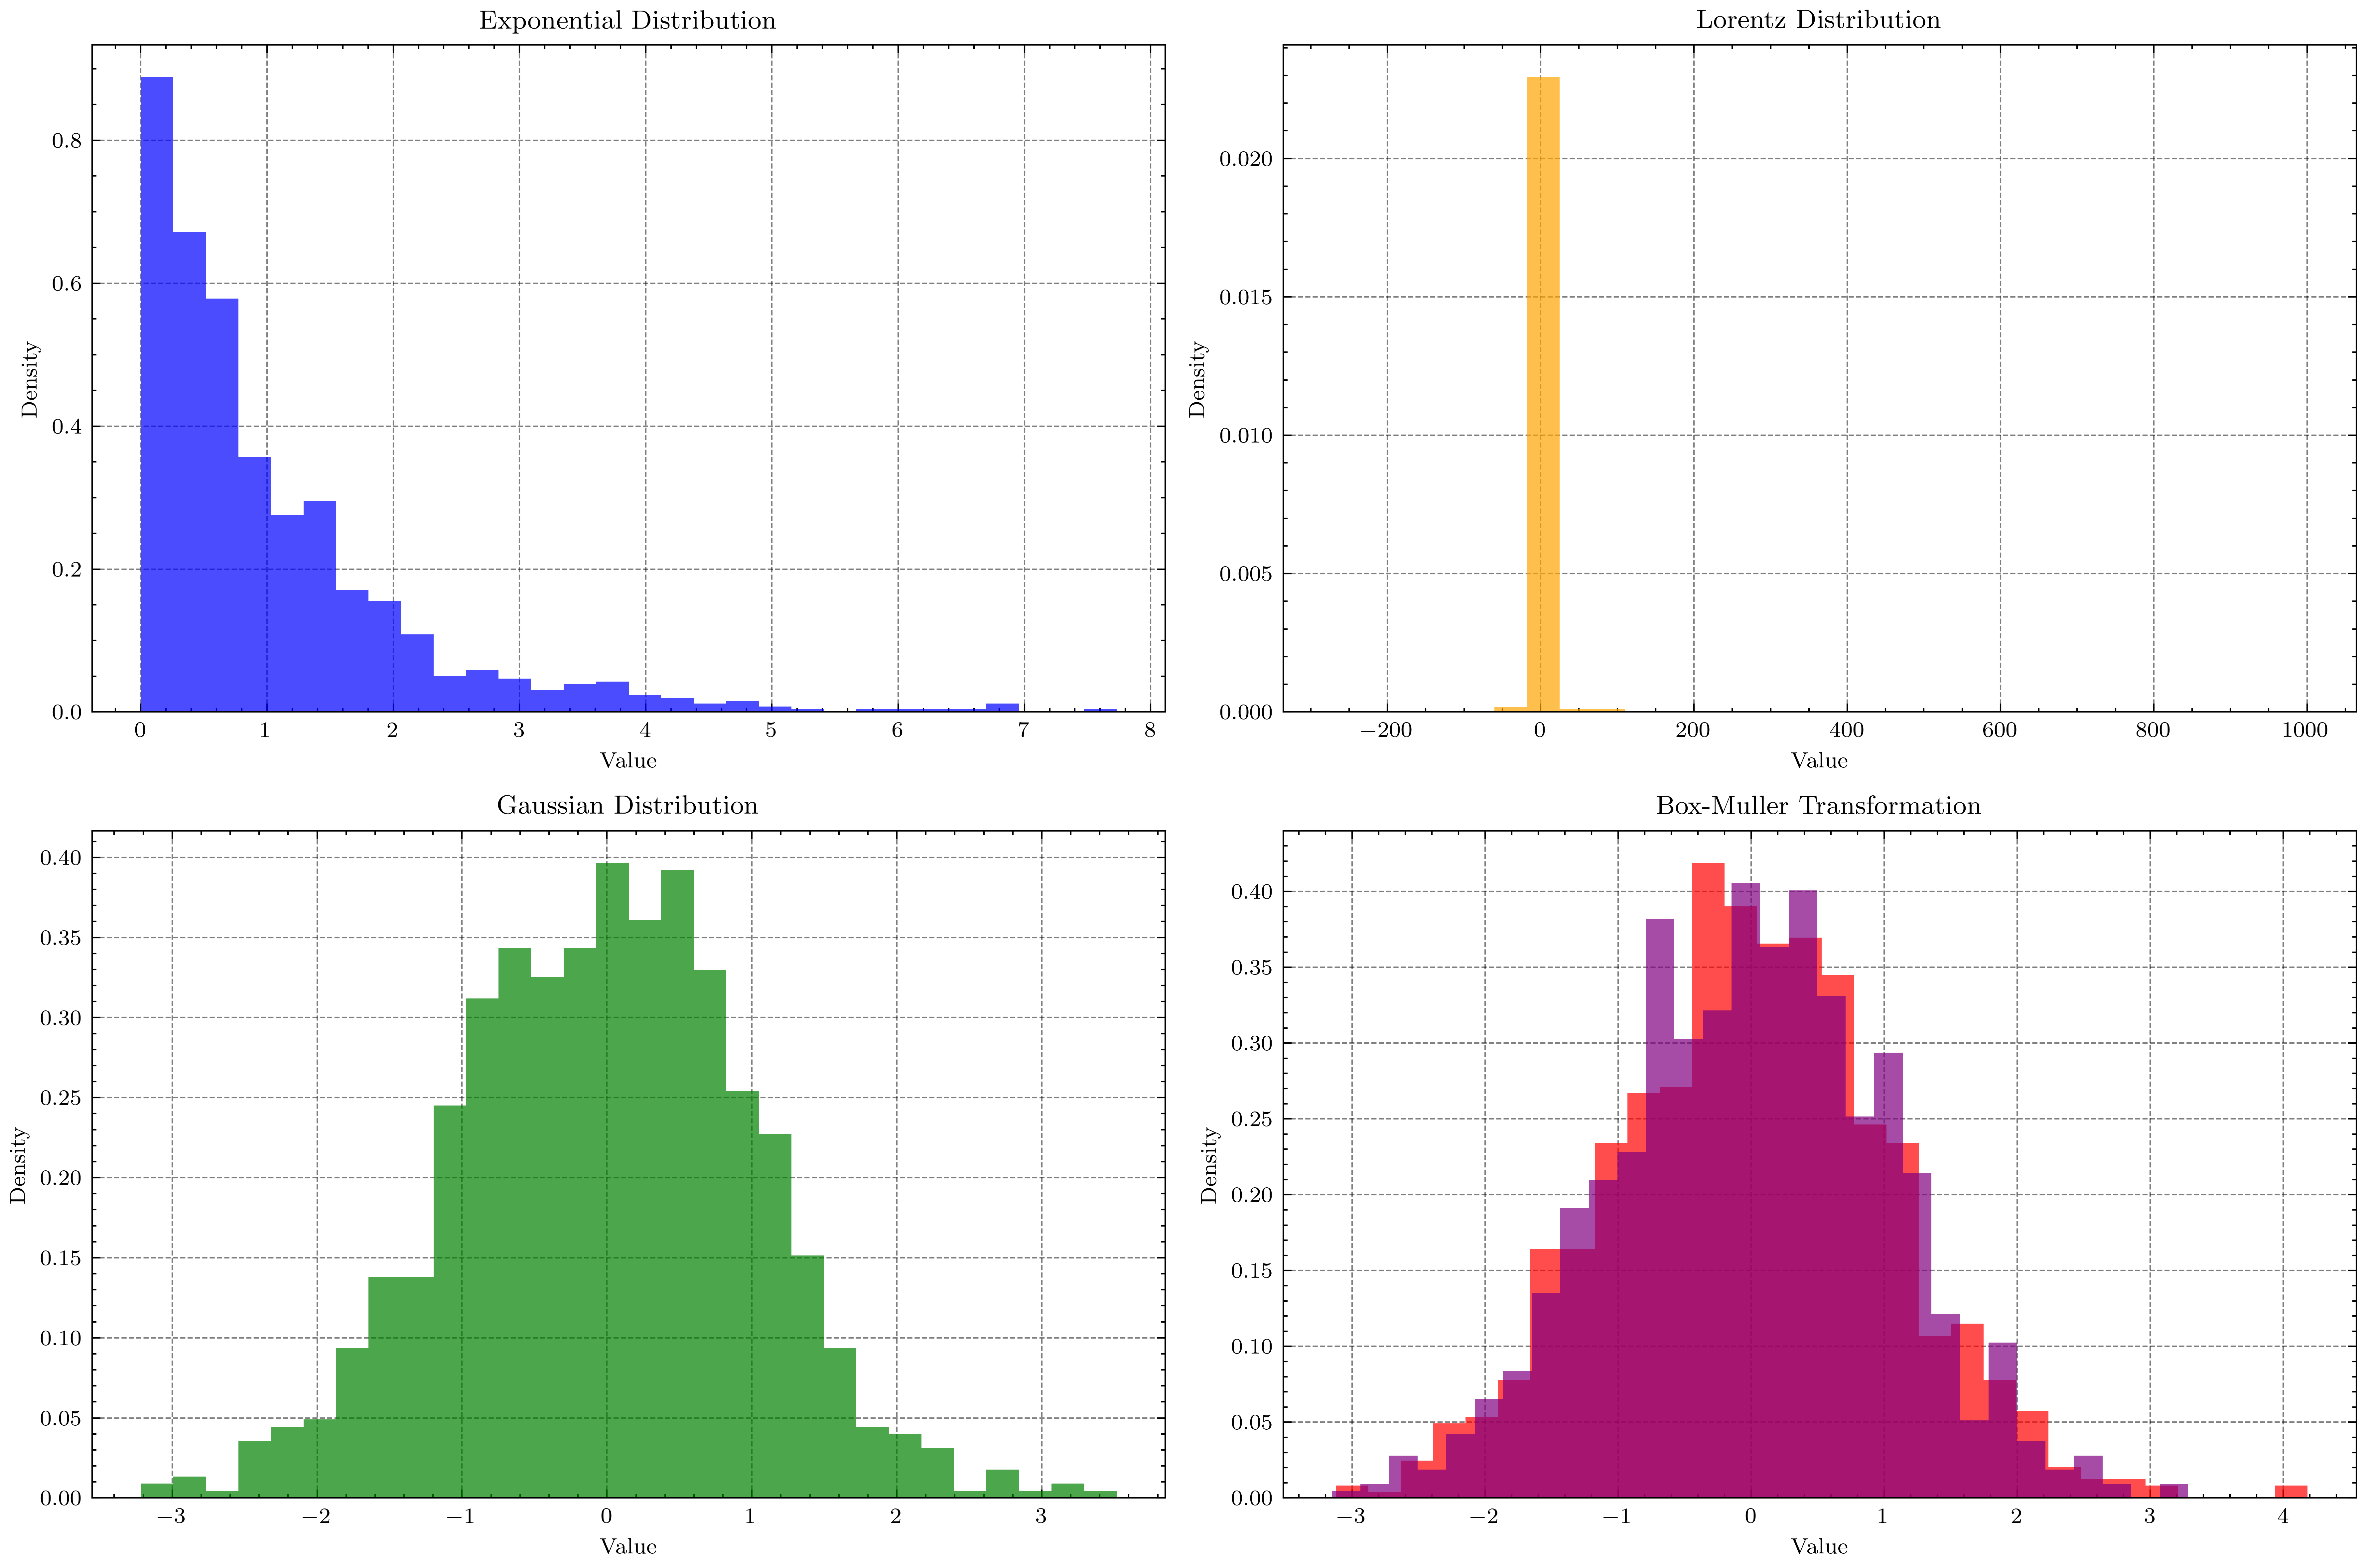

In [10]:
# Generate random numbers from each distribution
exp_numbers = exponential_generator(a=1, size=1000)
lorentz_numbers = lorentz_generator(mu=0, b=1, size=1000)
gaussian_numbers = gaussian_generator(mu=0, sigma=1, size=1000)

# Perform Box-Muller transformation on Gaussian distributed random numbers
z1, z2 = box_muller(size=1000)

# Plot histograms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(exp_numbers, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(2, 2, 2)
plt.hist(lorentz_numbers, bins=30, density=True, alpha=0.7, color='orange')
plt.title('Lorentz Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(2, 2, 3)
plt.hist(gaussian_numbers, bins=30, density=True, alpha=0.7, color='green')
plt.title('Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(2, 2, 4)
plt.hist(z1, bins=30, density=True, alpha=0.7, color='red')
plt.hist(z2, bins=30, density=True, alpha=0.7, color='purple')
plt.title('Box-Muller Transformation')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [26]:
def acceptance_rejection(target_pdf, initial_pdf=None, n_samples=100000, range_start=0, range_end=1):
    """
    Generate random numbers from a target probability density function using
    the Acceptance-Rejection method within a specified range.

    Parameters:
        target_pdf (function): The target probability density function.
        initial_pdf (function): The initial probability density function.
                                Default is uniform distribution.
        n_samples (int): Number of samples to generate.
        range_start (float): Lower bound of the range for generating random numbers.
        range_end (float): Upper bound of the range for generating random numbers.

    Returns:
        Random samples from the target probability density function within the specified range.
    """
    if initial_pdf is None:
        initial_pdf = lambda x: 1  # Uniform distribution by default

    # Find c by evaluating the ratio at the highest value within the range
    x_values = np.linspace(range_start, range_end, 1000)
    
    max_ratio = max(target_pdf(x) / initial_pdf(x) for x in x_values)
    print("c =", max_ratio)
    
    samples = []
    success_count = 0

    for _ in range(n_samples):
        # Sample from the initial distribution within the specified range
        x = np.random.uniform(range_start, range_end)

        # Sample from uniform distribution for acceptance
        u = np.random.rand()

        # Acceptance condition
        if u <= target_pdf(x) / (max_ratio * initial_pdf(x)):
            samples.append(x)
            success_count += 1

    success_probability = success_count / n_samples
    average_iterations = 1 / success_probability if success_probability != 0 else float('inf')

    return samples, success_probability, average_iterations

In [27]:
# target PDF and initial PDF
target_pdf = lambda x: 2 * x 
initial_pdf = lambda x: 1 

samples, success_prob, avg_iterations = acceptance_rejection(target_pdf, initial_pdf)

# Success probability and average number of iterations required
print("Success probability:", success_prob)
print("Average iterations required:", avg_iterations)

c = 2.0


Success probability: 0.50078
Average iterations required: 1.9968848596189943


In [28]:
# Example 2: f(x) = e^(-2x/2) from uniform g(x)
target_pdf_2 = lambda x: np.exp(-2 * x)/2 
initial_pdf_2 = lambda x: 1 
samples_2, success_prob_2, avg_iterations_2 = acceptance_rejection(target_pdf_2, initial_pdf_2)
print("Example 2 Success probability:", success_prob_2)
print("Example 2 Average iterations required:", avg_iterations_2)

c = 0.5
Example 2 Success probability: 0.43249
Example 2 Average iterations required: 2.3121921894147843


In [29]:
# Example 3: f(x) = (p/2π)e^(-x^2/2) from g(x) = e^(-x)
target_pdf_3 = lambda x: (np.sqrt(2 / np.pi) * np.exp(-(x ** 2) / 2)) 
initial_pdf_3 = lambda x: np.exp(-x) 
samples_3, success_prob_3, avg_iterations_3 = acceptance_rejection(target_pdf_3, initial_pdf_3)
print("Example 3 Success probability:", success_prob_3)
print("Example 3 Average iterations required:", avg_iterations_3)

c = 1.315489246958914
Example 3 Success probability: 0.85667
Example 3 Average iterations required: 1.1673106330325562


In [30]:
# Example 4: Beta distribution f(x) = 6x(1 - x) from g(x)
target_pdf_4 = lambda x: 6 * x * (1 - x) 
initial_pdf_4 = lambda x: 1 
samples_4, success_prob_4, avg_iterations_4 = acceptance_rejection(target_pdf_4, initial_pdf_4)
print("Example 4 Success probability:", success_prob_4)
print("Example 4 Average iterations required:", avg_iterations_4)

c = 1.4999984969954943
Example 4 Success probability: 0.66656
Example 4 Average iterations required: 1.500240038406145


In [39]:
# The target distribution and its inverse CDF
def target_distribution(x):
    return np.exp(-2 * x)

def inverse_cdf(y):
    return -np.log(1 - y) / 2

# Inverse Transform Method
def inverse_transform_sampling(n, generator):
    transformed_samples = []
    for _ in range(n):
        u = next(generator)
        x = inverse_cdf(u)
        transformed_samples.append(x)
    return transformed_samples

# Accept/Reject Method
def accept_reject_sampling(n, generator):
    samples = []
    M = 1  # Majorizing constant for the sampling distribution
    while len(samples) < n:
        x = next(generator)
        u = next(generator)
        if u <= target_distribution(x) /(M):
            samples.append(x)
    return samples

In [40]:
num_samples = 2000

mlc_random_generator = mlc_generator(2**31, 1103515245)
samples_inverse_transform = inverse_transform_sampling(num_samples, mlc_random_generator)
samples_accept_reject = accept_reject_sampling(num_samples, mlc_random_generator)

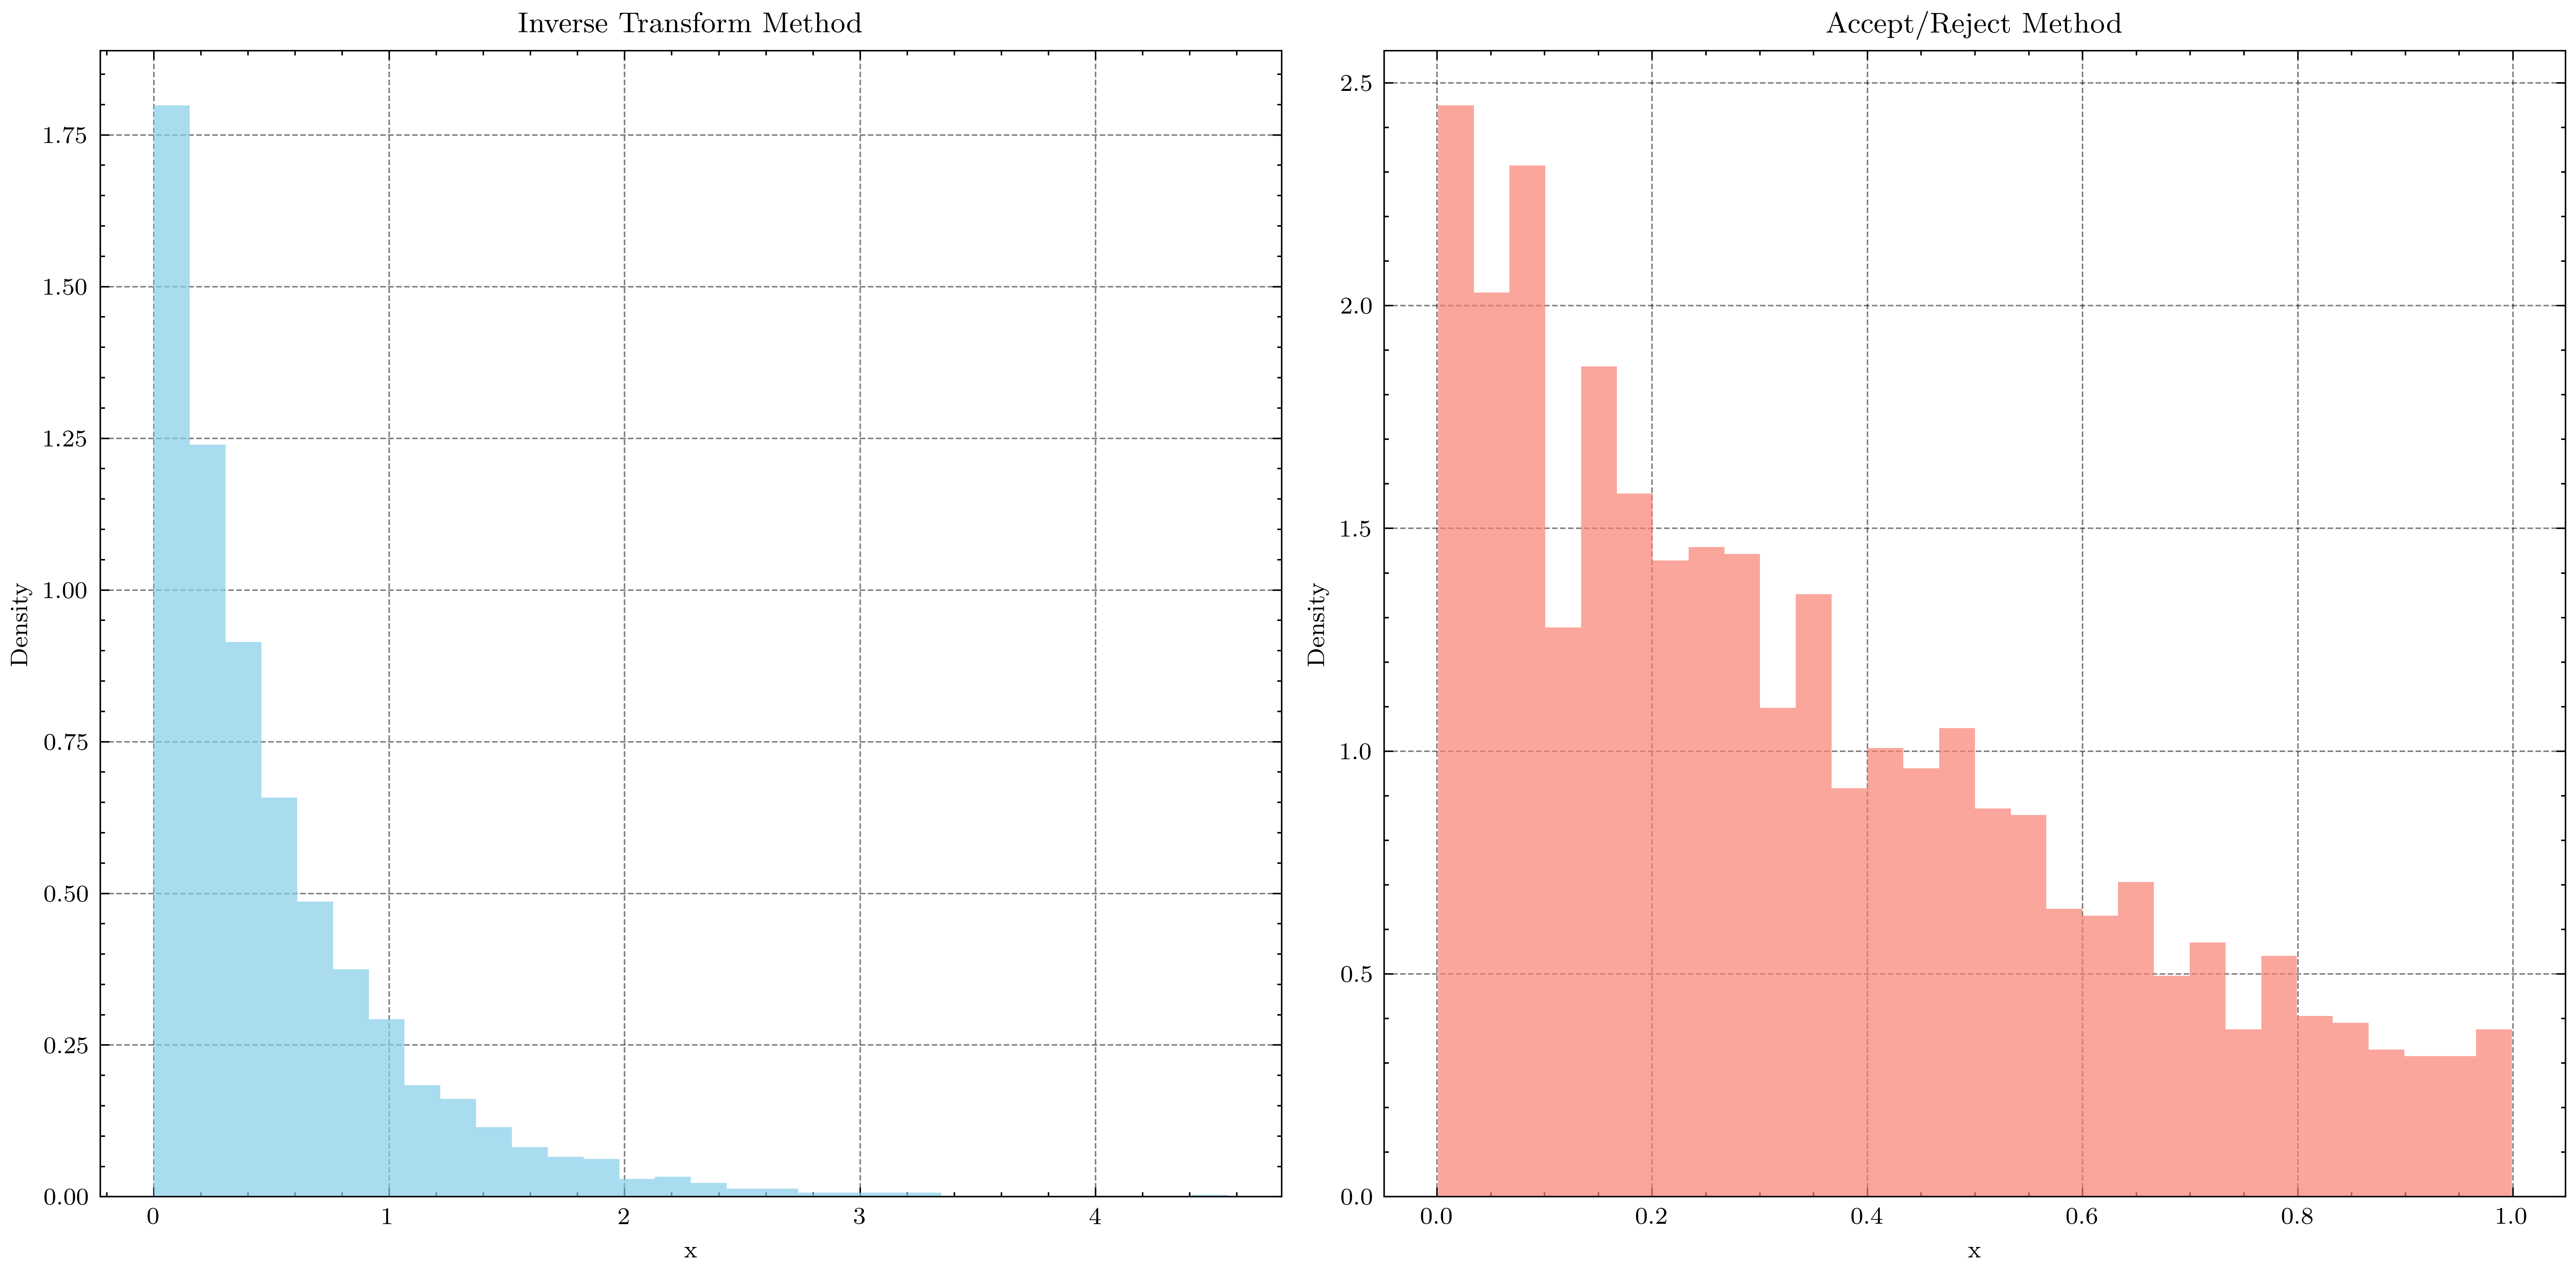

In [41]:
# histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(samples_inverse_transform, bins=30, density=True, color='skyblue', alpha=0.7)
plt.title('Inverse Transform Method')
plt.xlabel('x')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(samples_accept_reject, bins=30, density=True, color='salmon', alpha=0.7)
plt.title('Accept/Reject Method')
plt.xlabel('x')
plt.ylabel('Density')

plt.tight_layout()
plt.show()